<a href="https://colab.research.google.com/github/RaphaelZH/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/2_Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Making Predictions

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
def forward(x):
  y = w * x + b
  return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# 2. Linear Class

In [6]:
import torch
from torch.nn import Linear

In [7]:
torch.manual_seed(1)

In [8]:
model = Linear(in_features = 1, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [9]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
x =torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [11]:
x =torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# 3. Custom Modules

In [12]:
import torch
import torch.nn as nn

In [13]:
nn.Linear

torch.nn.modules.linear.Linear

In [14]:
nn.Module

torch.nn.modules.module.Module

In [15]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

In [16]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [17]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [18]:
torch.manual_seed(1)
model = LR(1, 1)

In [19]:
x = torch.tensor([1.0])
model.forward(x)

tensor([0.0739], grad_fn=<AddBackward0>)

In [20]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

# 4. Creating Dataset

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [22]:
X = torch.randn(10, 1)
print(X)

tensor([[ 0.1163],
        [ 0.7213],
        [ 0.5636],
        [ 1.1431],
        [ 0.8590],
        [ 0.7056],
        [-0.3406],
        [-1.2720],
        [-1.1948],
        [ 0.0250]])


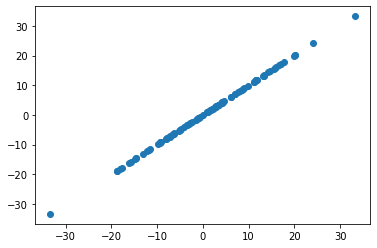

In [23]:
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o') # No more necessary to use .numpy().

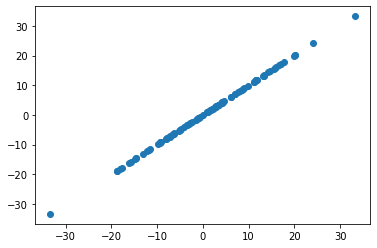

In [24]:
plt.plot(X, y, 'o')

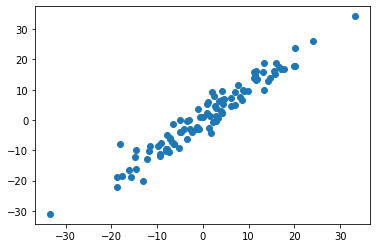

In [25]:
y = X + 3 * torch.randn(100, 1)
plt.plot(X, y, 'o')

Text(0.5, 0, 'X')

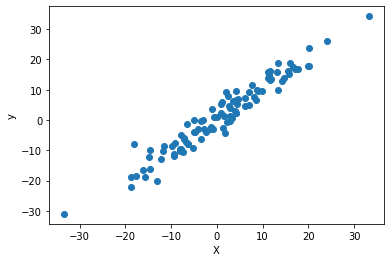

In [26]:
plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('X')

In [27]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [28]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [29]:
print(model.parameters())

<generator object Module.parameters at 0x7efba0d18c50>


In [30]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [31]:
w1 = w[0]
w1

tensor([0.5153], grad_fn=<SelectBackward>)

In [32]:
w1 = w[0][0]
w1

tensor(0.5153, grad_fn=<SelectBackward>)

In [33]:
b1 = b[0]
b1

tensor(-0.4414, grad_fn=<SelectBackward>)

In [34]:
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)


In [35]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [36]:
def get_params():
  return (w[0][0].item(), b[0].item()) # return w[0][0].item(), b[0].item()

In [37]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y) # plt.plot(X, y, 'o')
  plt.show()

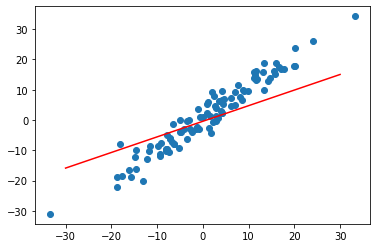

In [38]:
plot_fit('Initial Model')